# Goals

The purpose of this report is to conduct a deep analysis of user behavior on the website, focusing on active users, engagement time, and pageviews per active user. Based on the analysis results, the main goal is to provide strategic recommendations that can help the company improve user experience, engagement, and conversion on the website.

## Specific Objectives:
Identify pages with the highest active users and engagement.

Analyze the relationship between variables such as active users, pageviews per active user, and engagement time.

Provide strategic recommendations to improve user interaction and conversion.

# Research Questions

Some key research questions that this report aims to answer are:


* Which pages have the most active users?
* Is there a correlation between engagement time and active users?
* Do pages with high active users also have high pageviews per active user?
* Which pages have low active users, and what can be done to increase engagement on those pages?
* Are there pages that need content improvement or promotion optimization to increase engagement and conversion?

# Analysis Methodology

Steps taken in this analysis:

1. Data Cleaning: The data used has been cleaned to ensure there are no missing values and all values are in appropriate formats for analysis.

2. Descriptive Analysis: Descriptive statistics were performed to get an overview of the data distribution, including mean, median, and standard deviation.

3. Data Visualization: Bar charts, tables, and other visualizations were used to show patterns of active users, pageviews per active user, and engagement time.

4. Correlation Analysis: The relationship between active users, pageviews per active user, and engagement time was assessed to find patterns that can inform decision-making.

# Setting Up the Libraries I Will Use in This Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Data CSV

In [ ]:
df = pd.read_csv('report_feb.csv')

#Menampilkan Beberapa Baris Pertama Data

In [ ]:
print("Menampilkan beberapa baris pertama data:")
print(df.head().to_string())

Menampilkan beberapa baris pertama data:
                          Jalur halaman dan kelompok tampilan  Tampilan  Pengguna aktif  Tayangan per pengguna aktif  Waktu engagement rata-rata per pengguna aktif  Jumlah peristiwa  Peristiwa utama  Pendapatan total
0  /efek-samping-dan-gejala-konsumsi-narkoba-jenis-sabu-sabu/     13842           11982                     1.155233                                      71.303539             49691                0                 0
1                                                           /      6879            3827                     1.797492                                      27.651163             21757                0                 0
2          /betis-kram-saat-tidur-penyebab-dan-penanganannya/      3927            3475                     1.130072                                      60.231655             14857                0                 0
3       /kardiovaskular-pengertian-sebab-dan-contoh-penyakit/      3288            2735    

# Data Cleaning

##Checking for missing data

In [ ]:
#check missing values disetiap kolom
print ("Check data yang hilang")
print (df.isnull().sum())

Check data yang hilang
Jalur halaman dan kelompok tampilan              0
Tampilan                                         0
Pengguna aktif                                   0
Tayangan per pengguna aktif                      0
Waktu engagement rata-rata per pengguna aktif    0
Jumlah peristiwa                                 0
Peristiwa utama                                  0
Pendapatan total                                 0
dtype: int64


In [ ]:
#Menampilkan persentase missing value
print ("Check persentase data yang hilang")
print((df.isnull().sum() / len(df)) * 100)

Check persentase data yang hilang
Jalur halaman dan kelompok tampilan              0.0
Tampilan                                         0.0
Pengguna aktif                                   0.0
Tayangan per pengguna aktif                      0.0
Waktu engagement rata-rata per pengguna aktif    0.0
Jumlah peristiwa                                 0.0
Peristiwa utama                                  0.0
Pendapatan total                                 0.0
dtype: float64


## Penanganan Data yang Hilang

In [ ]:
# Menghapus baris dengan missing values
df_cleaned = df.dropna()

In [ ]:
# Mengisi data yang hilang
df['Tampilan'] = df['Tampilan'].fillna(df['Tampilan'].mean())
df['Pengguna aktif']  = df['Pengguna aktif'].fillna(df['Pengguna aktif'].mean())
df['Tayangan per pengguna aktif'] = df['Tayangan per pengguna aktif'].fillna(df['Tayangan per pengguna aktif'].median())

In [ ]:
# Mengisi dengan Metode Forward Fill / Backward Fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

<ipython-input-20-82c9c953ec4a>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-20-82c9c953ec4a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
# Mengisi dengan nilai tetap
df.fillna(0, inplace=True)

## Mengecek dan Menghapus Data Duplikat

In [ ]:
# Cek jumlah data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [ ]:
# Menampilkan informasi data terbaru
print("Informasi data terbaru:")
print(df_cleaned.info())

Informasi data terbaru:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Jalur halaman dan kelompok tampilan            1110 non-null   object 
 1   Tampilan                                       1110 non-null   int64  
 2   Pengguna aktif                                 1110 non-null   int64  
 3   Tayangan per pengguna aktif                    1110 non-null   float64
 4   Waktu engagement rata-rata per pengguna aktif  1110 non-null   float64
 5   Jumlah peristiwa                               1110 non-null   int64  
 6   Peristiwa utama                                1110 non-null   int64  
 7   Pendapatan total                               1110 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 69.5+ KB
None


## Mengecek dan Mengubah Tipe Data (Data Type)

In [ ]:
# Mengecek tipe data kolom
print("Mengecek tipe data kolom")
print(df_cleaned.dtypes)

Mengecek tipe data kolom
Jalur halaman dan kelompok tampilan               object
Tampilan                                           int64
Pengguna aktif                                     int64
Tayangan per pengguna aktif                      float64
Waktu engagement rata-rata per pengguna aktif    float64
Jumlah peristiwa                                   int64
Peristiwa utama                                    int64
Pendapatan total                                   int64
dtype: object


#Data Exploration!

## Analyst Descriptive

Statistik deskriptif memberikan gambaran umum tentang distribusi data dalam bentuk ringkasan, seperti mean, median, standar deviasi, min, max, dan quartiles. Ini membantu untuk memahami sebaran data dan mendeteksi anomali lebih lanjut

In [ ]:
# Menghitung statistik deskriptif untuk data numerik
desc_stats = df_cleaned.describe()
print("\nStatistik Deskriptif:")
print(desc_stats)


Statistik Deskriptif:
           Tampilan  Pengguna aktif  Tayangan per pengguna aktif  \
count   1110.000000     1110.000000                  1110.000000   
mean      83.053153       63.790991                     1.248310   
std      531.595070      427.327556                     0.420555   
min        1.000000        0.000000                     0.000000   
25%        2.000000        2.000000                     1.000000   
50%        8.000000        7.000000                     1.133939   
75%       30.000000       25.000000                     1.333333   
max    13842.000000    11982.000000                     7.000000   

       Waktu engagement rata-rata per pengguna aktif  Jumlah peristiwa  \
count                                    1110.000000       1110.000000   
mean                                       31.198147        280.320721   
std                                        47.609419       1852.941872   
min                                         0.000000          1.0000

## Matriks Korelasi
Hal ini dilakukan untuk melihat hubungan antar variabel dalam dataset. Dengan matriks korelasi kita bisa mengetahui apakah ada hubungan positif atau negatif antara variabel-variabel tertentu

In [ ]:
# Matriks korelasi untuk kolom tertentu
corr_matrix = df_cleaned[['Tampilan', 'Pengguna aktif', 'Tayangan per pengguna aktif', 'Waktu engagement rata-rata per pengguna aktif', 'Jumlah peristiwa']].corr()

# Menampilkan matriks korelasi
print("\nMatriks Korelasi Antara Variabel:")
print(corr_matrix)


Matriks Korelasi Antara Variabel:
                                               Tampilan  Pengguna aktif  \
Tampilan                                       1.000000        0.981344   
Pengguna aktif                                 0.981344        1.000000   
Tayangan per pengguna aktif                    0.059887        0.019035   
Waktu engagement rata-rata per pengguna aktif  0.060946        0.062320   
Jumlah peristiwa                               0.995012        0.993827   

                                               Tayangan per pengguna aktif  \
Tampilan                                                          0.059887   
Pengguna aktif                                                    0.019035   
Tayangan per pengguna aktif                                       1.000000   
Waktu engagement rata-rata per pengguna aktif                     0.121758   
Jumlah peristiwa                                                  0.038655   

                                             

## Visualization


### Pengguna aktif per halaman

In [ ]:
# Top 10 Jumlah Pengguna Aktif per Halaman Membuat tabel jumlah Pengguna Aktif per Halaman
top_10_pengguna_aktif = df_cleaned[['Jalur halaman dan kelompok tampilan', 'Pengguna aktif']].sort_values(by='Pengguna aktif', ascending=False).head(10)
top_10_pengguna_aktif['Rank'] = range(1, len(top_10_pengguna_aktif) + 1)
top_10_pengguna_aktif = top_10_pengguna_aktif[['Rank', 'Jalur halaman dan kelompok tampilan', 'Pengguna aktif']]


# Menampilkan tabel
print("Tabel Pengguna Aktif per Halaman:")
print(top_10_pengguna_aktif)

Tabel Pengguna Aktif per Halaman:
    Rank                Jalur halaman dan kelompok tampilan  Pengguna aktif
0      1  /efek-samping-dan-gejala-konsumsi-narkoba-jeni...           11982
1      2                                                  /            3827
2      3  /betis-kram-saat-tidur-penyebab-dan-penanganan...            3475
3      4  /kardiovaskular-pengertian-sebab-dan-contoh-pe...            2735
6      5  /7-cara-ampuh-turunkan-kolesterol-secara-alami...            2117
8      6  /leher-kaku-dan-kepala-pusing-gejala-penyakit-...            1965
7      7    /15-pantangan-makanan-untuk-pengidap-asam-urat/            1864
5      8                               /indeks-pemeriksaan/            1646
11     9    /tanda-tanda-pcos-pada-wanita-yang-dimunculkan/            1465
10    10                                    /kantor-cabang/            1167


### Waktu Engagement vs Pengguna Aktif

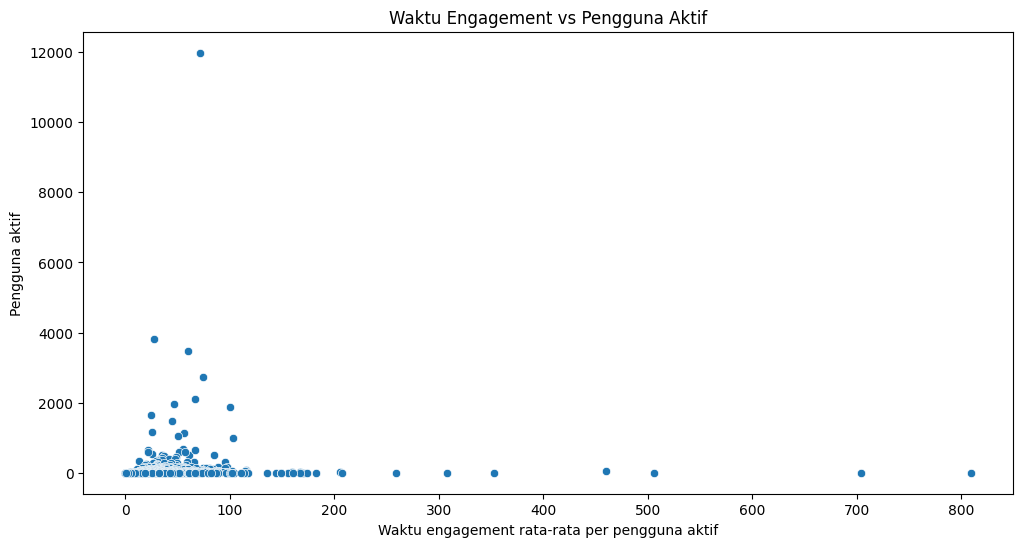

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Waktu engagement rata-rata per pengguna aktif', y='Pengguna aktif', data=df_cleaned)
plt.title('Waktu Engagement vs Pengguna Aktif')
plt.savefig('waktu_engagement_vs_pengguna_aktif.png')  # Menyimpan visualisasi sebagai gambar
plt.show()

### Matriks Korelasi

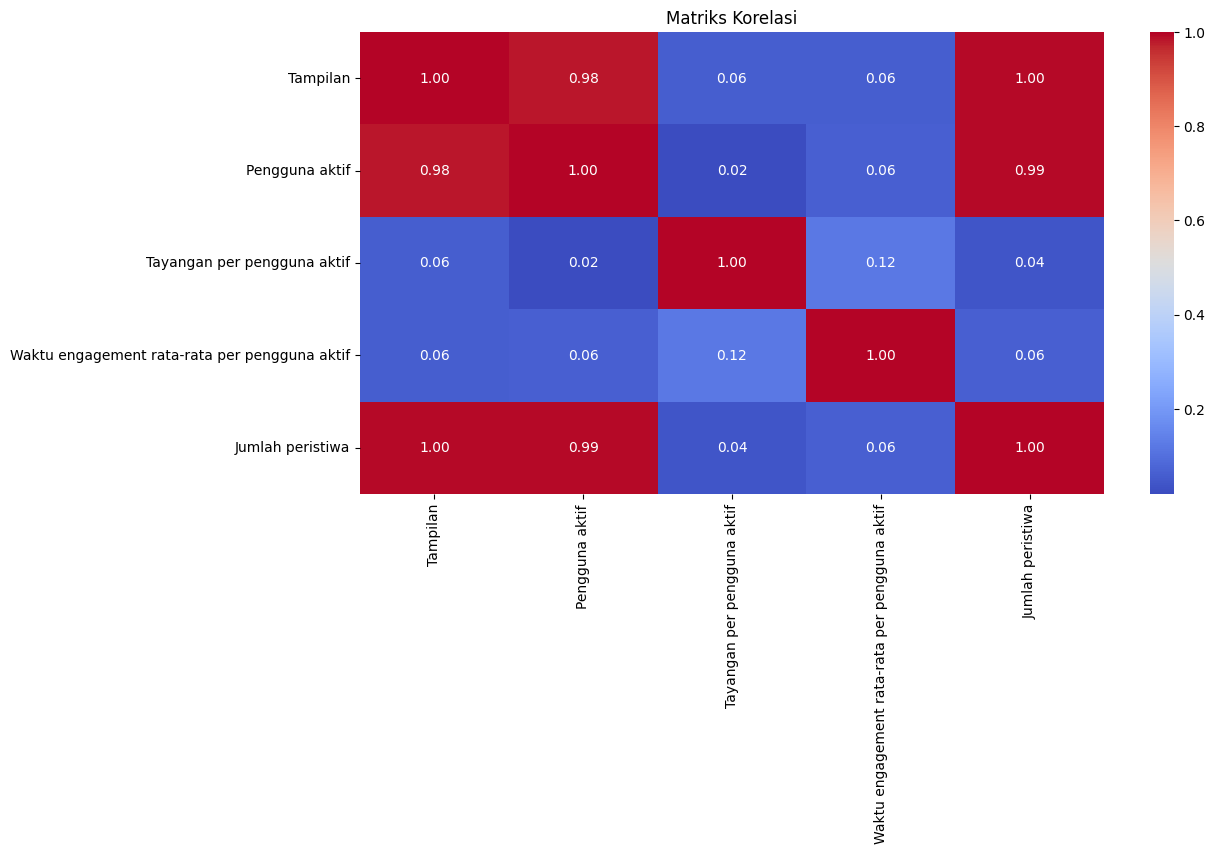

In [ ]:
# Heatmap untuk Matriks Korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.savefig('matriks_korelasi.png')  # Menyimpan visualisasi sebagai gambar
plt.show()

# Analysis Results

In [ ]:
top_engagement = df.sort_values(by='Waktu engagement rata-rata per pengguna aktif', ascending=False).head(5)
top_users = df.sort_values(by='Pengguna aktif', ascending=False).head(5)

print("\nTop 5 Halaman dengan Waktu Engagement Tertinggi:")
print(top_engagement[['Jalur halaman dan kelompok tampilan', 'Waktu engagement rata-rata per pengguna aktif']])

print("\nTop 5 Halaman dengan Pengguna Aktif Tertinggi:")
print(top_users[['Jalur halaman dan kelompok tampilan', 'Pengguna aktif']])


Top 5 Halaman dengan Waktu Engagement Tertinggi:
                    Jalur halaman dan kelompok tampilan  \
1043  /produk/kesehatan-calon-jamaah-haji-umroh-ekse...   
877             /produk/hipertensi-dan-penyakit-ginjal/   
922                                        /barbiturat/   
147   /cito-health-harmony-pilihan-tepat-untuk-keseh...   
828                            /faktor-resiko-obesitas/   

      Waktu engagement rata-rata per pengguna aktif  
1043                                        809.000  
877                                         704.000  
922                                         506.000  
147                                         460.125  
828                                         353.000  

Top 5 Halaman dengan Pengguna Aktif Tertinggi:
                 Jalur halaman dan kelompok tampilan  Pengguna aktif
0  /efek-samping-dan-gejala-konsumsi-narkoba-jeni...           11982
1                                                  /            3827
2  /betis-kram-s

### **Analysis Results**  

#### **1. Top 5 Pages with the Highest Engagement Time**  
The pages with the highest **average engagement time per active user** indicate that users are spending a significant amount of time on these pages, which suggests high user interest or detailed content.  

| Rank | Page URL | Average Engagement Time (Seconds) |
|------|------------------------------------------------|----------------------------|
| 1 | `/produk/kesehatan-calon-jamaah-haji-umroh-ekse...` | 809.00 |
| 2 | `/produk/hipertensi-dan-penyakit-ginjal/` | 704.00 |
| 3 | `/barbiturat/` | 506.00 |
| 4 | `/cito-health-harmony-pilihan-tepat-untuk-kesehatan/` | 460.13 |
| 5 | `/faktor-resiko-obesitas/` | 353.00 |

**Insights & Recommendations:**  
- The **high engagement time** on these pages suggests users are **deeply interested** in these topics.  
- Pages related to **medical products and health concerns** dominate the list, indicating a demand for **detailed health-related content**.  
- Recommendation:  
  - Optimize these pages with **better navigation, related content suggestions, or call-to-action (CTA)** to keep users engaged.  
  - Consider monetization strategies, such as **premium content, consultations, or product promotions**, since users spend more time here.  


#### **2. Top 5 Pages with the Highest Active Users**  
The pages with the most **active users** show where the majority of visitors land, indicating popular topics.  

| Rank | Page URL | Active Users |
|------|------------------------------------------------|--------------|
| 1 | `/efek-samping-dan-gejala-konsumsi-narkoba-jenis-sabu-sabu/` | 11,982 |
| 2 | `/` (Homepage) | 3,827 |
| 3 | `/betis-kram-saat-tidur-penyebab-dan-penanganannya/` | 3,475 |
| 4 | `/kardiovaskular-pengertian-sebab-dan-contoh-penyakit/` | 2,735 |
| 5 | `/7-cara-ampuh-turunkan-kolesterol-secara-alami-dan-aman-untuk-kesehatan/` | 2,117 |

**Insights & Recommendations:**  
- The **highest traffic page** is related to **drug side effects**, indicating significant user concern about substance abuse.  
- The **homepage** ranks second, meaning many users navigate from there to other sections.  
- Health-related topics, such as **muscle cramps, cardiovascular diseases, and cholesterol reduction**, attract high user interest.  
- Recommendation:  
  - Enhance the **homepage layout** to **guide users toward high-engagement content**.  
  - Improve **SEO and content marketing** strategies for health-related topics.  
  - Consider adding **interactive content** (e.g., self-assessment quizzes, expert Q&A) to increase engagement.  

---

### **Key Takeaways**  
1. **Health and drug-related topics dominate user interest**, both in terms of engagement time and active users.  
2. **The homepage plays a significant role** in directing traffic—optimizing navigation and content suggestions here can improve engagement.  
3. **High-engagement pages** present monetization opportunities, such as premium content, medical consultations, or health-related products.  

Would you like me to refine this further or add more specific recommendations?